In [1]:
%load_ext autoreload
%autoreload 2
from rustyspikes import *
from delayed_paper import *
from pyvis.network import Network
#plt.style.use(['dark_background'])

In [ ]:
log_path = r'C:\Users\iamkg0\Desktop\projects\rustyspikes\Prototype\logs\testing'
log_name = 'b_estimation.csv'

config = {
    'input_size': [8],
    'aw_time': [6],
    'sample_time': [150],
    'lr': [1],
    'runs': [5000],
    'd_lr': [10],
    'scale': [.7],
    'rt': [150],
    'num_rand_patterns': [5],
    'synaptic_limit': [1],
    'slow_tau': [100],
    'forget_tau': [100],
    'b': list(np.arange(200, 201) * .1),
    'max_delay': [100],
    'learning_rule': ['delayed'],
    'noise': [.3],
    'weights': [(1, 1)]
}
del_w_to_one = True

b_log = LogHandler(path=log_path, filename=log_name)

num_tries = 1
for i in config:
    num_tries *= len(config[i])
print(f'{num_tries} models will be generated')

np.random.seed(42)
patterns, num_inputs, num_patterns = sampler(num_inputs=config['input_size'][0], num_rand_patterns=config['num_rand_patterns'][0])
print(f'Patterns are: {patterns}')
b_log.create()
b_log.define_cols(('input_size', 'aw_time', 'sample_time', 'lr', 'runs', 'd_lr', 'scale', 'rt',
                            'num_patterns', 'synaptic_limit', 'slow_var_limit', 'slow_tau', 'forget_tau',
                            'spikes (0 is gt)', 'b', 'max_delay', 'learning_rule', 'noise', 'init_weights'))
b_log.comment([*patterns.values()])

run_number = 1
cfgs = cfg_slicer(config)
for cfg in cfgs:
    if cfg['learning_rule'] == 'delayed':
        delayed = True
    else:
        delayed = False
    bbb = cfg['b']
    print(f'Calculating run number {run_number} out of {num_tries}. b={bbb}')
    model = one_neu_dynamics(num_input=cfg['input_size'], scale=cfg['scale'], rt=cfg['rt'], interval=cfg['aw_time'],
                            learning_rule=cfg['learning_rule'], delayed=delayed,
                            lr=cfg['lr'], tau=30, d_lr=.1, synaptic_limit=cfg['synaptic_limit'],
                            slow_variable_limit=cfg['synaptic_limit'], max_delay=cfg['max_delay'], b=cfg['b'],
                            slow_tau=cfg['slow_tau'], forget_tau=cfg['forget_tau'], delay=0,
                            noise=cfg['noise'], weights=cfg['weights'], stick_del_w_to_one=del_w_to_one)

    # TRAIN
    model, delay, dd, num_spikes = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=cfg['runs'], lr=cfg['lr'], d_lr=cfg['d_lr'], test=False,
                    freeze_delays=False, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=True, logger=None, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)
    fig = plt.figure(dpi=100)
    plt.scatter(list(range(model.num_synapses())), np.array(model.get_delays())*.1)
    plt.ylim((0, cfg['max_delay']))
    plt.show()
    plt.plot(delay * .1)
    plt.show()

    # TEST
    model, *_ = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=int(cfg['runs']/config['num_rand_patterns'][0]), lr=cfg['lr'], d_lr=cfg['d_lr'], test=True,
                    freeze_delays=True, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=False, logger=b_log, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)
    run_number += 1
print('Done!')

In [ ]:
log_path = r'C:\Users\iamkg0\Desktop\projects\rustyspikes\Prototype\logs\testing'
log_name = 'test_2.csv'
log = LogHandler(path=log_path, filename=log_name)

config = {
    'input_size': [6],
    'aw_time': [4.5],
    'sample_time': [150],
    'lr': [.05],
    'runs': [50],
    'd_lr': [1],
    'scale': [0.7],
    'rt': [150],
    'num_rand_patterns': [5],
    'synaptic_limit': [1],
    'slow_tau': [100],
    'forget_tau': [100],
    'b': [7.6],
    'max_delay': [100],
    'learning_rule': ['pair_stdp', 't_stdp', 'strdp', 'delayed'],
    'noise': [.7],
    'weights': [(.4, .6)],
}


cfgs = cfg_slicer(config)
for cfg in cfgs:
    if cfg['learning_rule'] == 'delayed':
        delayed = True
    else:
        delayed = False
    model = one_neu_dynamics(num_input=cfg['input_size'], scale=cfg['scale'], rt=cfg['rt'], aw=cfg['aw_time'], interval=cfg['aw_time'],
                            learning_rule=cfg['learning_rule'], delayed=delayed,
                            lr=cfg['lr'], tau=30, d_lr=.1, synaptic_limit=cfg['synaptic_limit'],
                            slow_variable_limit=cfg['synaptic_limit'], max_delay=cfg['max_delay'], b=cfg['b'],
                            slow_tau=cfg['slow_tau'], forget_tau=cfg['forget_tau'], delay=0,
                            noise=cfg['noise'], weights=cfg['weights'], stick_del_w_to_one=del_w_to_one)
    
    # TRAIN
    model, *_ = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=cfg['runs'], lr=cfg['lr'], d_lr=cfg['d_lr'], test=False,
                    freeze_delays=False, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=False, logger=None, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)

    # TEST
    model, *_ = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=cfg['runs'], lr=cfg['lr'], d_lr=cfg['d_lr'], test=True,
                    freeze_delays=False, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=False, logger=log, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)

In [ ]:
# PROTOCOL CONFIGURATION

config = {
    'input_size': [6],
    'aw_time': [4.5],
    'sample_time': [150],
    'lr': [.05],
    'runs': [50],
    'd_lr': [1],
    'scale': [0.7, 0.8, 0.9, 1, 1.1],
    'rt': [150],
    'num_rand_patterns': [5],
    'synaptic_limit': [1, None],
    'slow_tau': [100],
    'forget_tau': [100],
    'b': [7.6],
    'max_delay': [100],
    'learning_rule': ['pair_stdp', 't_stdp', 'strdp', 'delayed'],
    'noise': [1, 1.3],
    'weights': [(.4, .6)],
}

del_w_to_one = True

num_tries = 1
for i in config:
    num_tries *= len(config[i])
num_tries

In [ ]:
patterns, num_inputs, num_patterns = sampler(num_inputs=config['input_size'][0], num_rand_patterns=config['num_rand_patterns'][0])
log.create()
log.define_cols(('input_size', 'aw_time', 'sample_time', 'lr', 'runs', 'd_lr', 'scale', 'rt',
                            'num_patterns', 'synaptic_limit', 'slow_var_limit', 'slow_tau', 'forget_tau',
                            'spikes (0 is gt)', 'b', 'max_delay', 'learning_rule', 'noise', 'init_weights'))
log.comment([*patterns.values()])
patterns

In [ ]:
cfgs = cfg_slicer(config)
for cfg in cfgs:
    if cfg['learning_rule'] == 'delayed':
        delayed = True
    else:
        delayed = False
    model = one_neu_dynamics(num_input=cfg['input_size'], scale=cfg['scale'], rt=cfg['rt'], aw=cfg['aw_time'], interval=cfg['aw_time'],
                            learning_rule=cfg['learning_rule'], delayed=delayed,
                            lr=cfg['lr'], tau=30, d_lr=.1, synaptic_limit=cfg['synaptic_limit'],
                            slow_variable_limit=cfg['synaptic_limit'], max_delay=cfg['max_delay'], b=cfg['b'],
                            slow_tau=cfg['slow_tau'], forget_tau=cfg['forget_tau'], delay=0,
                            noise=cfg['noise'], weights=cfg['weights'], stick_del_w_to_one=del_w_to_one)
    
    # TRAIN
    model, *_ = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=cfg['runs'], lr=cfg['lr'], d_lr=cfg['d_lr'], test=False,
                    freeze_delays=False, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=False, logger=None, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)

    # TEST
    model, *_ = run_protocol(model, sampler=patterns, sample_time=cfg['sample_time'], interval=cfg['aw_time'],
                    runs=cfg['runs'], lr=cfg['lr'], d_lr=cfg['d_lr'], test=True,
                    freeze_delays=False, gather_data=False, plot=False, plast_type=cfg['learning_rule'],
                    return_gatherer=False, gather_delays=False, logger=log, init_weights=cfg['weights'],
                    stick_del_w_to_one=del_w_to_one)
    
    if cfg['learning_rule'] == 'delayed':
        break

In [29]:
df = pd.read_csv(r'C:\Users\iamkg0\Desktop\projects\rustyspikes\Prototype\logs\testing\data_050525.csv', comment='#', delimiter='\t')
##### !!!!! test_runs=int(cfg['runs']/config['num_rand_patterns'][0]

#df = pd.read_csv(r'C:\Users\iamkg0\Desktop\projects\rustyspikes\Prototype\logs\testing\data_290425___.csv', comment='#', delimiter='\t')
#df = pd.read_csv(r'C:\Users\iamkg0\Desktop\projects\rustyspikes\Prototype\logs\testing\data_290425___.csv', comment='#', delimiter='\t', converters={'spikes (0 is gt)': pd.eval})
#df[df['spikes (0 is gt)'].map(len) == 5]
runs = df['runs'][0]
df['spikes (0 is gt)'] = df['spikes (0 is gt)'].apply(lambda x: np.array(eval(x)), 0)
sps = np.stack(df['spikes (0 is gt)'], axis=0)
sps

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       ...,
       [405, 307, 323, 361, 376],
       [504, 452, 425, 501, 465],
       [585, 576, 575, 556, 606]])

In [30]:
#sps[np.where(np.sum(sps[:, 1:], axis=1) == 0)] = np.ones(5) * 1
#sps.shape

In [38]:
freq_known = sps[:,0]
freq_unknown = np.sum(sps[:,1:], axis=1) / 4
Q = np.divide(2*freq_known, (freq_known + freq_unknown)) - 1
freq_unknown.shape

C:\Users\iamkg0\AppData\Local\Temp\ipykernel_18260\3788018576.py:3: RuntimeWarning: invalid value encountered in divide
  Q = np.divide(2*freq_known, (freq_known + freq_unknown)) - 1


(5184,)

In [144]:
# WORKS!!!
ai = np.where(Q>.3)[0]
a = sps[ai]
bi = np.where(np.max(a[:, 1:], axis=1) < a[:,0]-100)[0]
b = a[bi]
ci = np.where(np.sum(b, axis=1) > 100)[0]
filtered = df.loc[[*ai[bi[ci]].tolist()]]
#filtered = df.loc[ai]
filtered[['runs', 'num_patterns', 'spikes (0 is gt)', 'learning_rule']]

,runs,num_patterns,spikes (0 is gt),learning_rule
1139,312,5,"[624, 312, 312, 312, 312]",delayed
1141,312,5,"[261, 86, 122, 154, 150]",delayed
1715,312,5,"[624, 312, 312, 312, 312]",delayed
3190,312,5,"[292, 96, 145, 190, 178]",delayed


In [40]:
delayed_idxs = df.index[df['learning_rule'] == 'delayed'].tolist()
pair_idxs = df.index[df['learning_rule'] == 'pair_stdp'].tolist()
t_idxs = df.index[df['learning_rule'] == 't_stdp'].tolist()
strdp_idxs = df.index[df['learning_rule'] == 'strdp'].tolist()

In [41]:
delayed_n = np.sum(sps[delayed_idxs], axis=1)
pair_n = np.sum(sps[pair_idxs], axis=1)
t_n = np.sum(sps[t_idxs], axis=1)
strdp_n = np.sum(sps[strdp_idxs], axis=1)
strdp_n

array([   0,    0,    0, ..., 1627, 1666, 1584])

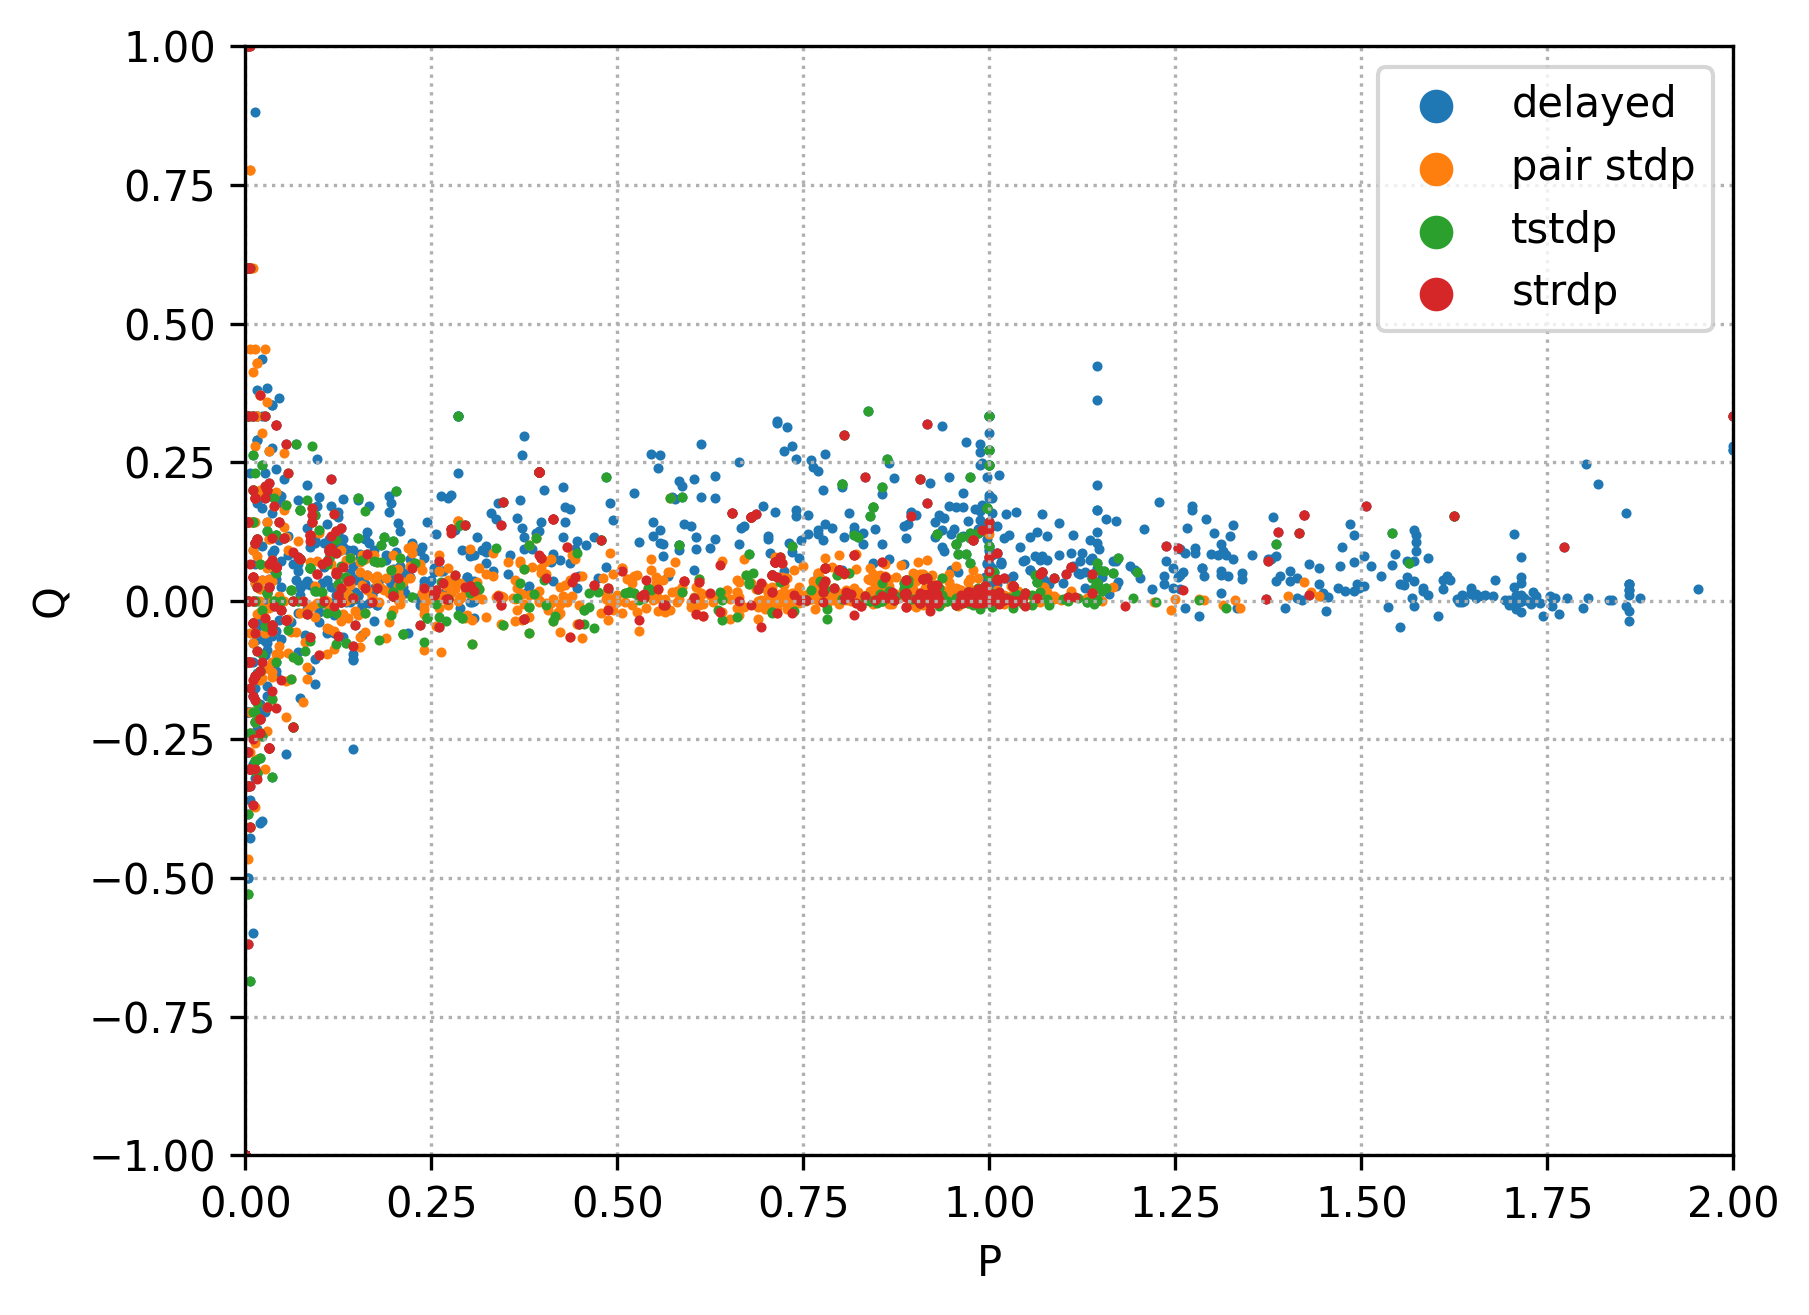

In [69]:
pointsize = 2
#all_n = np.sum(sps, axis=1)
all_n = sps[:,0] / runs
plt.figure(dpi=300)
plt.grid(visible=True, which='major', linestyle=':')
plt.scatter(all_n[delayed_idxs], Q[delayed_idxs], s=pointsize, label='delayed')
plt.scatter(all_n[pair_idxs], Q[pair_idxs], s=pointsize, label='pair stdp')
plt.scatter(all_n[t_n], Q[t_n], s=pointsize, label='tstdp')
plt.scatter(all_n[strdp_n], Q[strdp_n], s=pointsize, label='strdp')
plt.ylim((-1, 1))
plt.xlim((0, 2))
plt.xlabel('P')
plt.ylabel('Q')
plt.legend(markerscale=5)
plt.show()

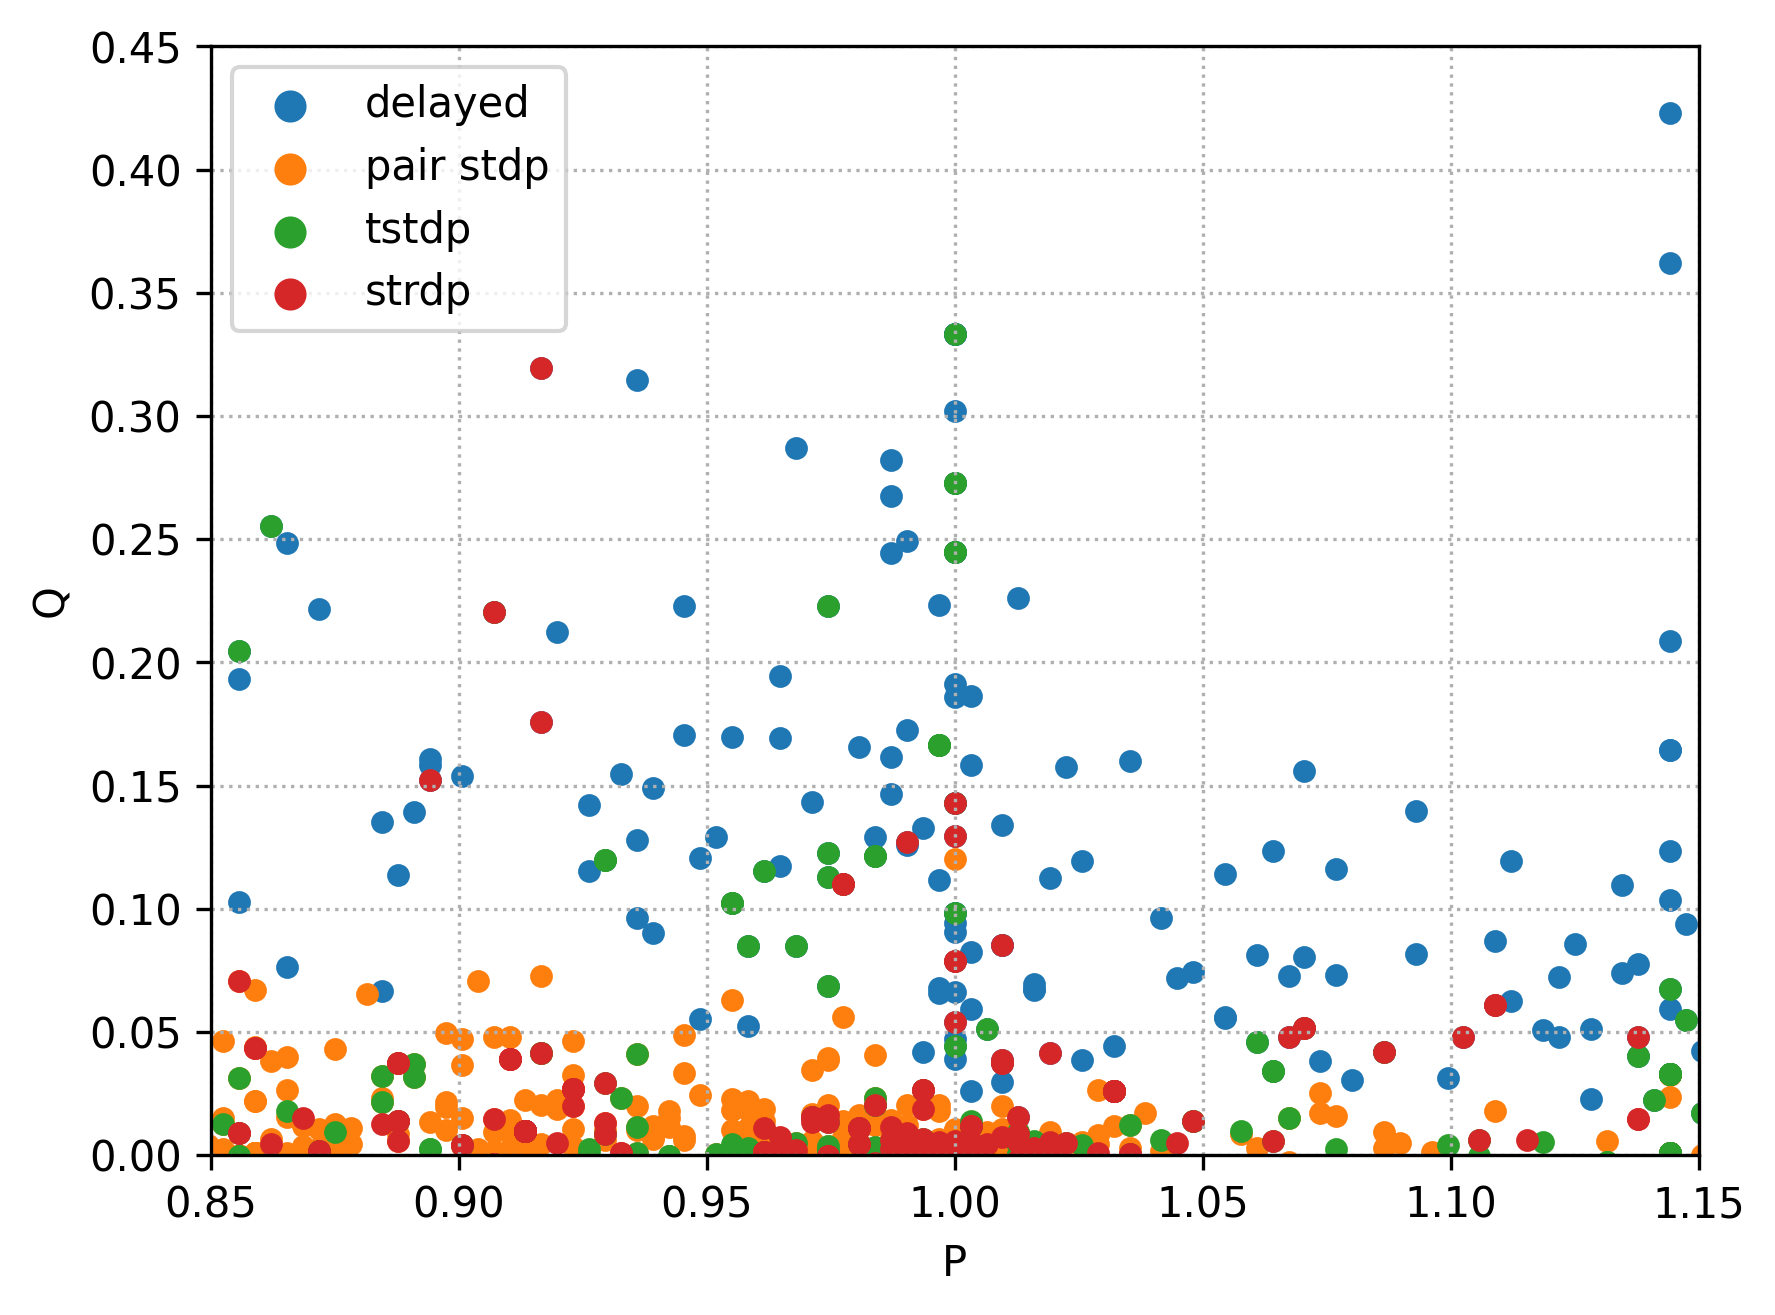

In [70]:
pointsize = 20
#all_n = np.sum(sps, axis=1)
all_n = sps[:,0] / runs
plt.figure(dpi=300)
plt.grid(visible=True, which='major', linestyle=':')
plt.scatter(all_n[delayed_idxs], Q[delayed_idxs], s=pointsize, label='delayed')
plt.scatter(all_n[pair_idxs], Q[pair_idxs], s=pointsize, label='pair stdp')
plt.scatter(all_n[t_n], Q[t_n], s=pointsize, label='tstdp')
plt.scatter(all_n[strdp_n], Q[strdp_n], s=pointsize, label='strdp')
plt.ylim((0.0, .45))
plt.xlim((0.85, 1.15))
plt.xlabel('P')
plt.ylabel('Q')
plt.legend(markerscale=1.5)
plt.show()

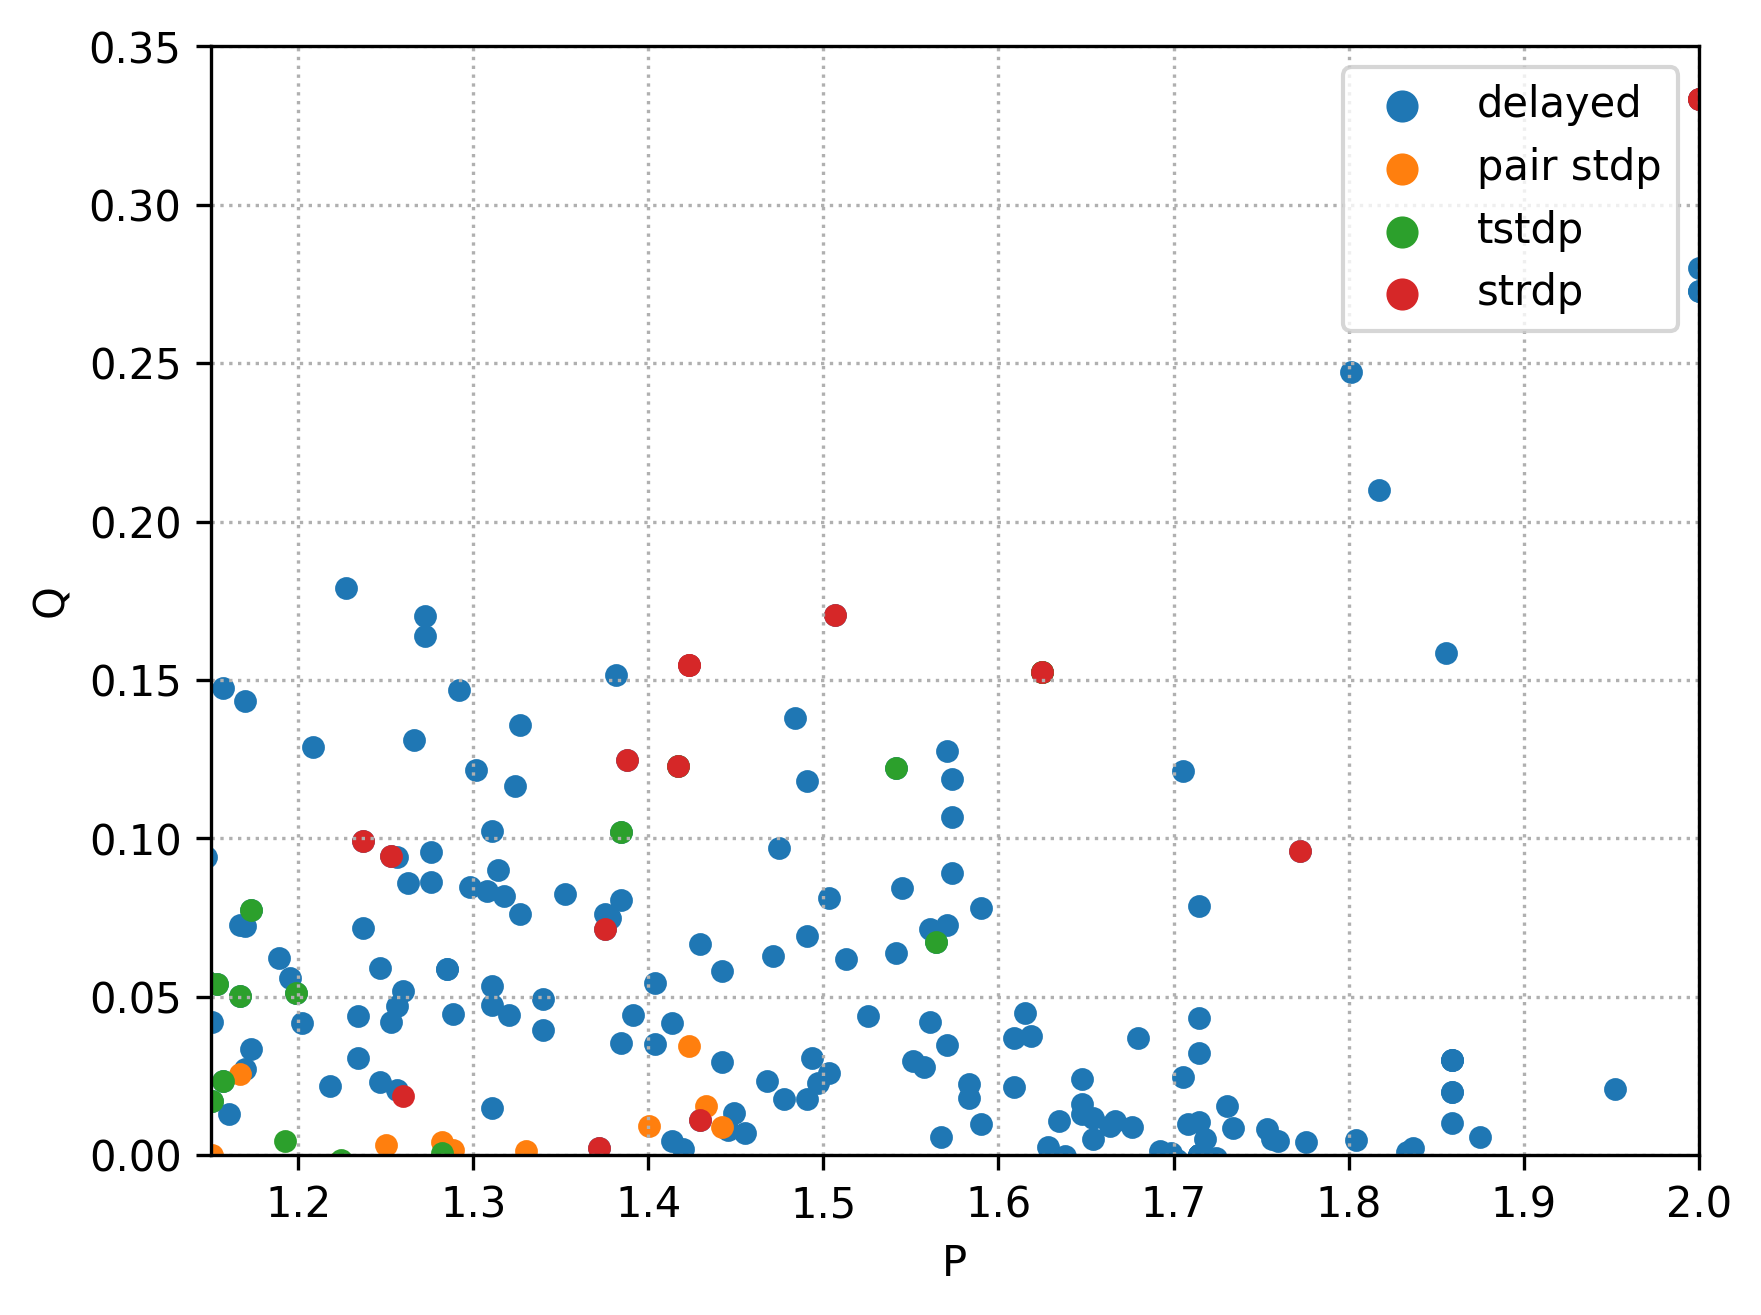

In [126]:
pointsize = 20
#all_n = np.sum(sps, axis=1)
all_n = sps[:,0] / runs
plt.figure(dpi=300)
plt.grid(visible=True, which='major', linestyle=':')
plt.scatter(all_n[delayed_idxs], Q[delayed_idxs], s=pointsize, label='delayed')
plt.scatter(all_n[pair_idxs], Q[pair_idxs], s=pointsize, label='pair stdp')
plt.scatter(all_n[t_n], Q[t_n], s=pointsize, label='tstdp')
plt.scatter(all_n[strdp_n], Q[strdp_n], s=pointsize, label='strdp')
plt.ylim((0, .35))
plt.xlim((1.15, 2))
plt.xlabel('P')
plt.ylabel('Q')
plt.legend(markerscale=1.5)
plt.show()

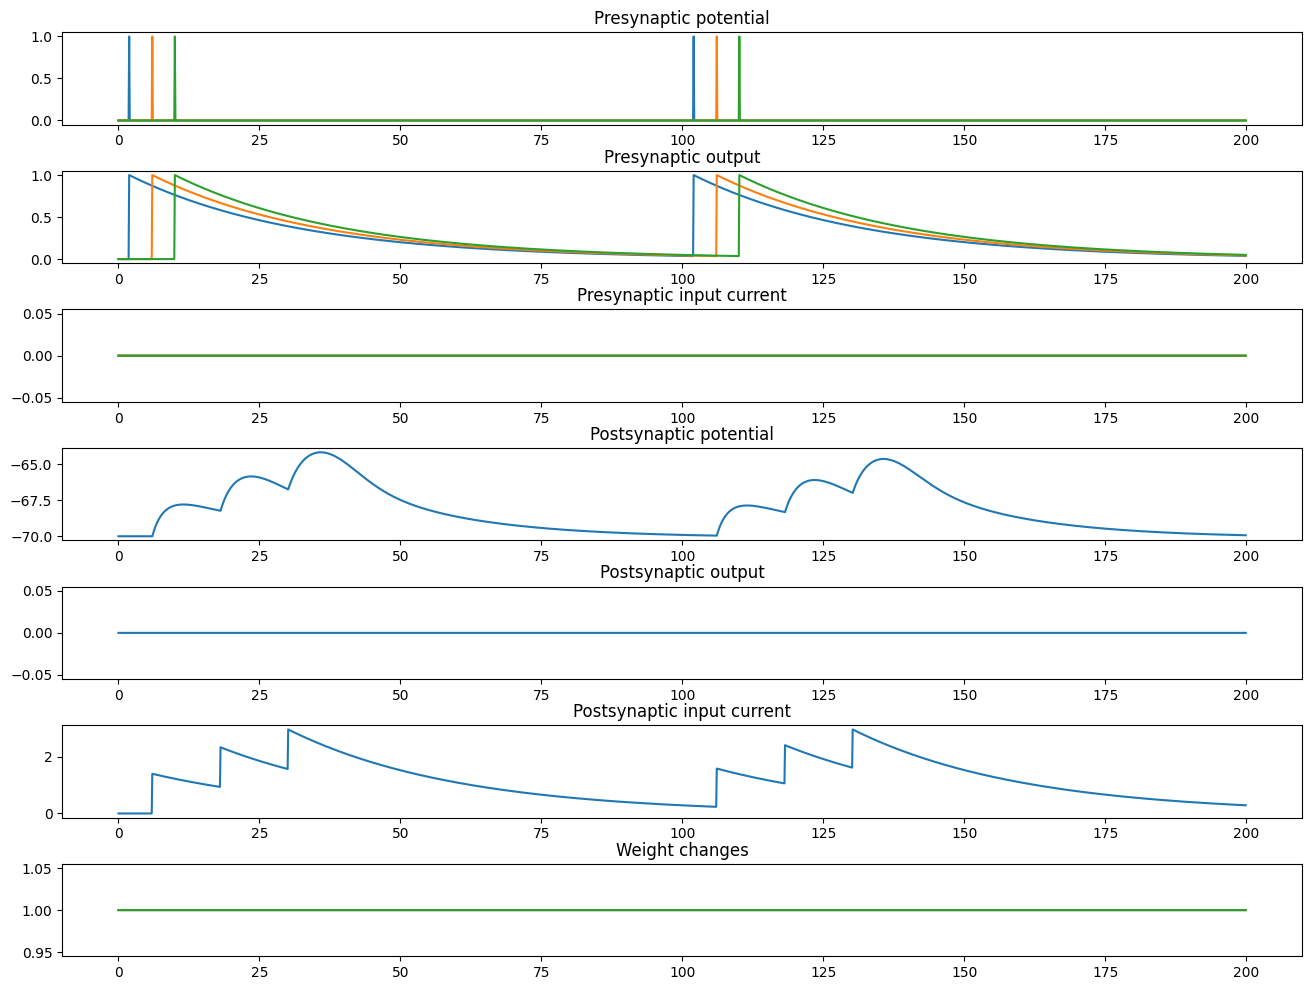

In [115]:
demo = delayed_3_to_1(out_type='IZH')
demo.set_scale(1.4)
demo.syn_by_edge[0, 3].delay = 40
demo.syn_by_edge[1, 3].delay = 120
demo.syn_by_edge[2, 3].delay = 200
gath = Gatherer(demo)
for i in range(2000):
    demo.tick()
    gath.gather_stats()
draw_stats_gatherer(*gath.get_stats(), time_range=np.arange(200*10)*.1)

60


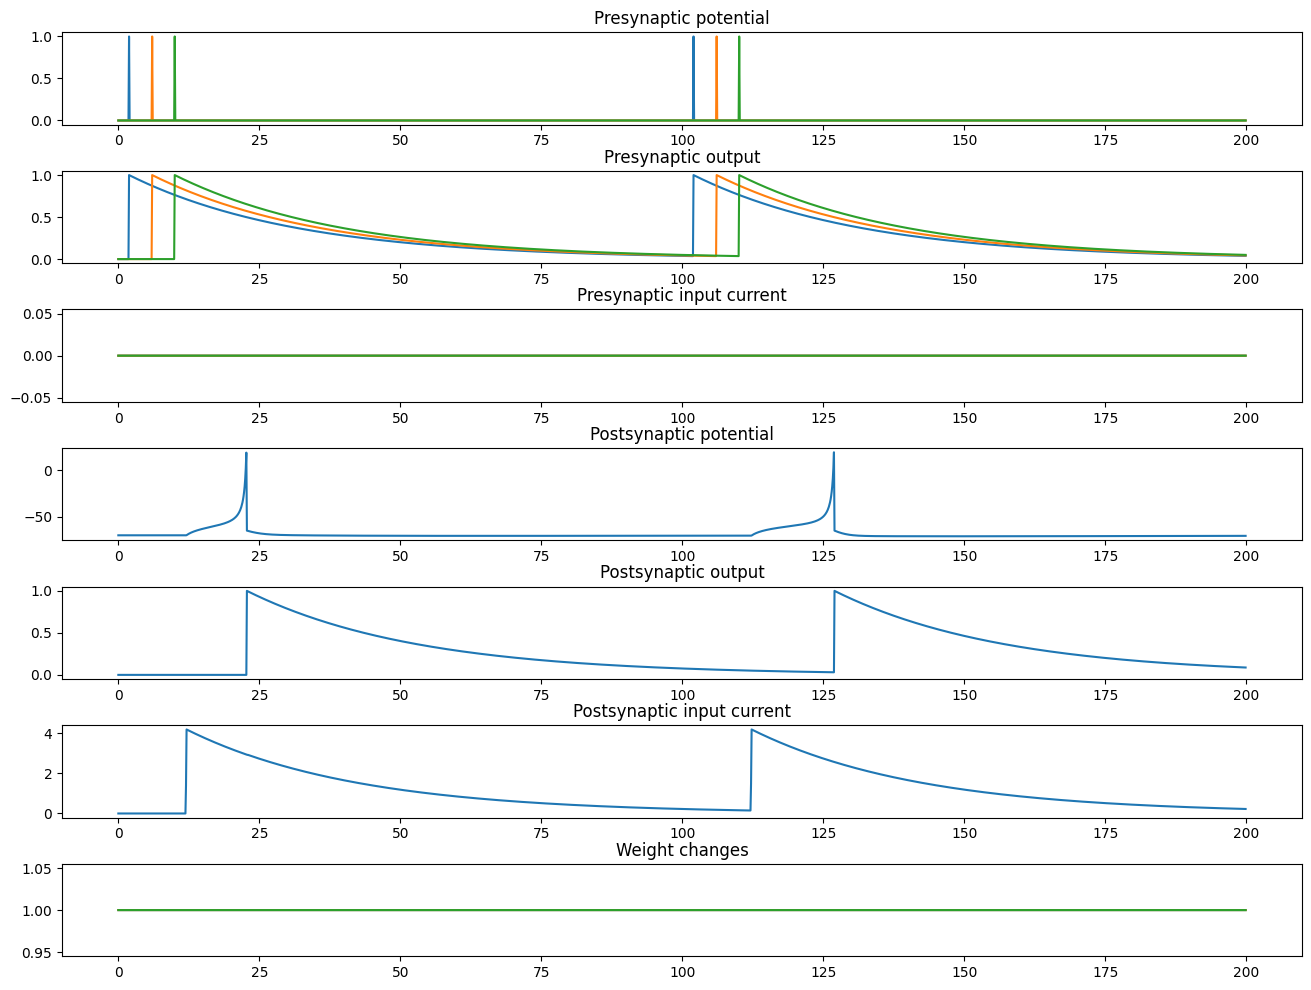

In [116]:
demo1 = delayed_3_to_1(out_type='IZH')
demo1.set_scale(1.4)
demo1.syn_by_edge[0, 3].delay = 100
demo1.syn_by_edge[1, 3].delay = 60
demo1.syn_by_edge[2, 3].delay = 20
print(demo1.syn_by_edge[1, 3].delay)
gath1 = Gatherer(demo1)
for i in range(2000):
    demo1.tick()
    gath1.gather_stats()
draw_stats_gatherer(*gath1.get_stats(), time_range=np.arange(200*10)*.1)